In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv("AirPassengers.csv")

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


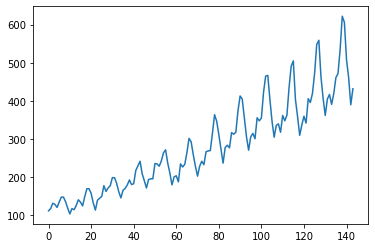

In [4]:
plt.figure(figsize=(6,4))
plt.plot(df["#Passengers"])
plt.show()

In [5]:
result = seasonal_decompose(df["#Passengers"], model ="multiplicative", period=12)

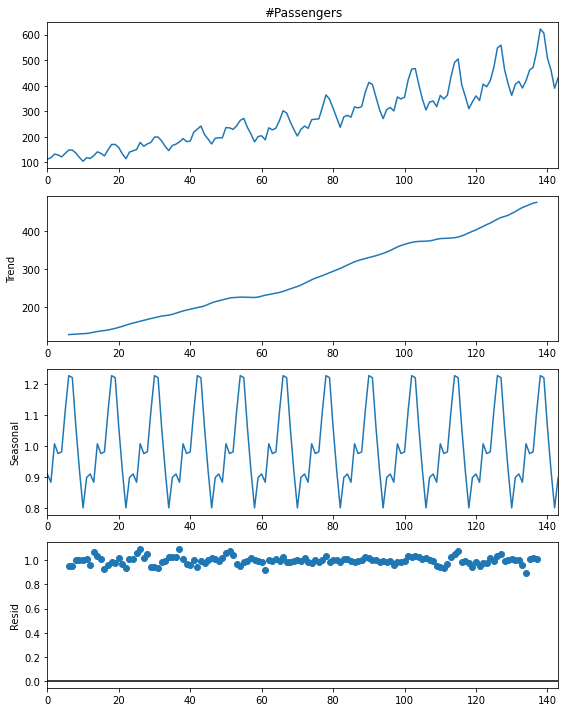

In [6]:
plt.rcParams.update({'figure.figsize': (8,10)})
result.plot()
plt.show()

# stationery and differencing

In [7]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


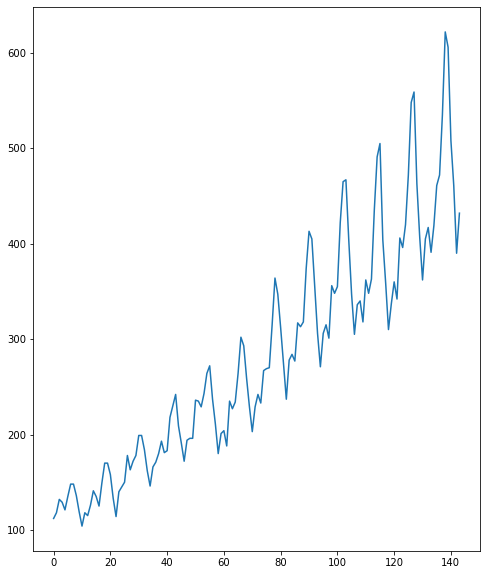

In [9]:
plt.plot(df["#Passengers"])

In [10]:
difference = df["#Passengers"] - df["#Passengers"].shift(1)

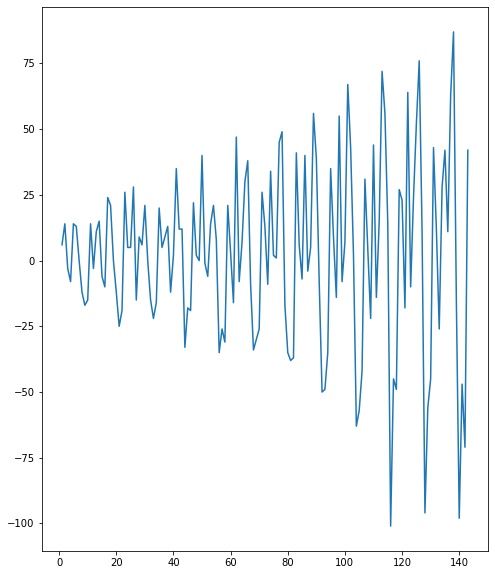

In [11]:
plt.plot(difference.dropna())

In [12]:
seasonal_difference = df["#Passengers"] - df["#Passengers"].shift(12)

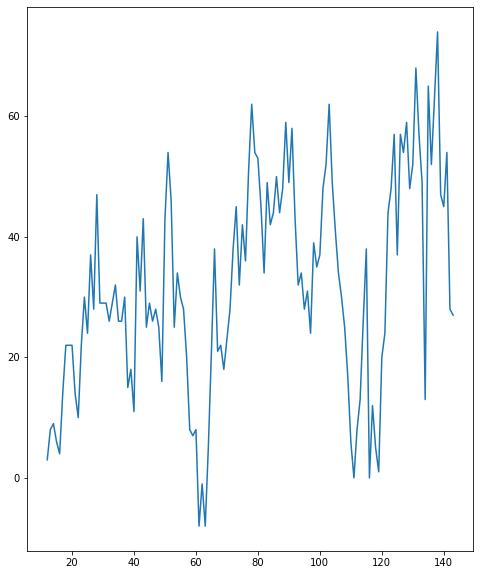

In [13]:
plt.plot(seasonal_difference.dropna())

In [14]:
double_difference = seasonal_difference - seasonal_difference.shift(1)

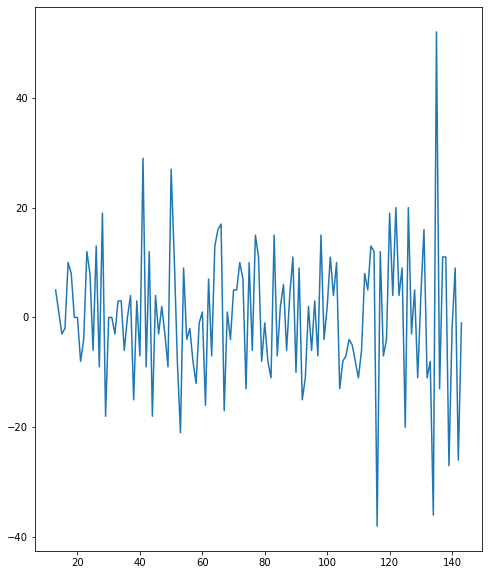

In [15]:
plt.plot(double_difference.dropna())

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

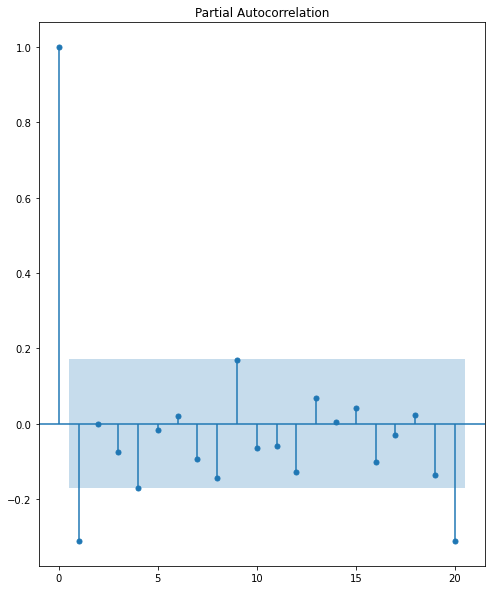

In [17]:
plot_pacf(double_difference.dropna(), lags=20)
plt.show()

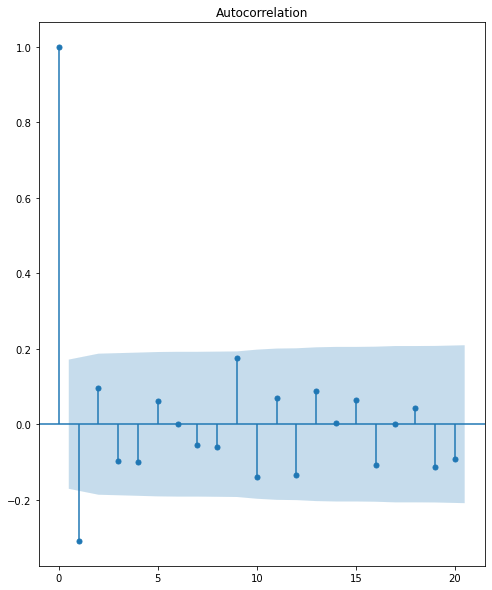

In [18]:
plot_acf(double_difference.dropna(), lags=20)
plt.show()

In [19]:
df["#Passengers"].shape

(144,)

# arima

In [20]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [21]:
model=ARIMA(df["#Passengers"],order=(1,1,1))
model=model.fit()

In [22]:
df["forecast"] = model.predict(start=101 , end=143)

In [23]:
df.tail()

,Month,#Passengers,forecast
139,1960-08,606,-40.288792
140,1960-09,508,-35.283191
141,1960-10,461,-9.551907
142,1960-11,390,3.093402
143,1960-12,432,21.733947


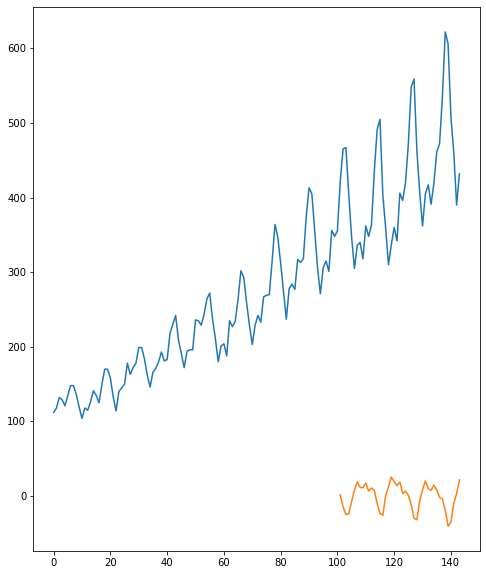

In [24]:
plt.figure()
plt.plot(df[["#Passengers","forecast"]])
plt.show()

# SARIMAX

In [25]:
import statsmodels.api as sm

In [26]:
model = sm.tsa.statespace.SARIMAX(df['#Passengers'],order=(1, 1, 1),seasonal_order=(1,1,1,12), trend="t")
model = model.fit()

In [27]:
df['forecast2']=model.predict(start=101,end=143)

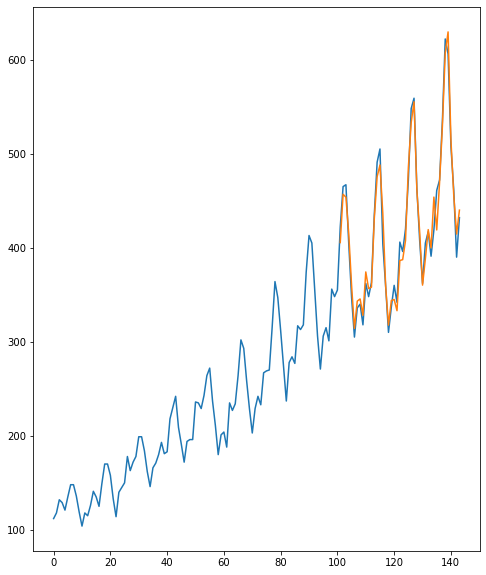

In [28]:
plt.figure()
plt.plot(df[["#Passengers","forecast2"]])
plt.show()